In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', None)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix



In [2]:
 df_P = pd.read_csv('telecon.csv', encoding = 'iso-8859-1') #carrega o csv usando pd

In [3]:
df_P.head(100)

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.000,0.000,0.0,0.0000,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.000000,52.333333,0.000000,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.000000,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.100,9.100,0.0,0.0000,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.000000,263.333333,0.000000,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.000000,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.000,0.000,0.0,0.0000,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.000000,9.000000,0.000000,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.000000,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.000,0.000,0.0,0.0000,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,3.666667,0.000000,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.000000,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.000,0.000,0.0,0.0000,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.000000,222.333333,0.000000,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.000000,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,

In [4]:
df_P.dtypes

rev_Mean       float64
mou_Mean       float64
totmrc_Mean    float64
da_Mean        float64
ovrmou_Mean    float64
                ...   
kid11_15        object
kid16_17        object
creditcd        object
eqpdays        float64
Customer_ID      int64
Length: 100, dtype: object

In [5]:
df_P.isnull().sum()

rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
kid11_15       1732
kid16_17       1732
creditcd       1732
eqpdays           1
Customer_ID       0
Length: 100, dtype: int64

In [6]:

(df_P.isnull().mean() * 100)


rev_Mean       0.357
mou_Mean       0.357
totmrc_Mean    0.357
da_Mean        0.357
ovrmou_Mean    0.357
               ...  
kid11_15       1.732
kid16_17       1.732
creditcd       1.732
eqpdays        0.001
Customer_ID    0.000
Length: 100, dtype: float64

In [7]:

df_P.drop(columns=['mou_Mean'], inplace=True)
df_P.drop(columns=['ovrmou_Mean'], inplace=True)
df_P.drop(columns=['da_Mean'], inplace=True)
df_P.drop(columns=['totmrc_Mean'], inplace=True)


In [8]:
(df_P.isnull().mean() * 100)

rev_Mean       0.357
ovrrev_Mean    0.357
vceovr_Mean    0.357
datovr_Mean    0.357
roam_Mean      0.357
               ...  
kid11_15       1.732
kid16_17       1.732
creditcd       1.732
eqpdays        0.001
Customer_ID    0.000
Length: 96, dtype: float64

In [9]:
df_P = df_P.dropna(thresh=len(df_P) * 0.3, axis=1)

In [10]:
(df_P.isnull().mean() * 100)

rev_Mean       0.357
ovrrev_Mean    0.357
vceovr_Mean    0.357
datovr_Mean    0.357
roam_Mean      0.357
               ...  
kid11_15       1.732
kid16_17       1.732
creditcd       1.732
eqpdays        0.001
Customer_ID    0.000
Length: 96, dtype: float64

In [11]:
df_P.drop(columns=['change_mou'], inplace=True)

In [12]:
df_P.drop(columns=['roam_Mean'], inplace=True)

In [13]:
df_P.drop(columns=['datovr_Mean'], inplace=True)

In [14]:
df_P.drop(columns=['vceovr_Mean'], inplace=True)

In [15]:
df_P.drop(columns=['ovrrev_Mean'], inplace=True)

In [16]:
(df_P.isnull().mean() * 100)

rev_Mean         0.357
change_rev       0.891
drop_vce_Mean    0.000
drop_dat_Mean    0.000
blck_vce_Mean    0.000
                 ...  
kid11_15         1.732
kid16_17         1.732
creditcd         1.732
eqpdays          0.001
Customer_ID      0.000
Length: 91, dtype: float64

In [17]:
df_P.drop(columns=['change_rev'], inplace=True)

In [18]:
(df_P.isnull().mean() * 100)

rev_Mean         0.357
drop_vce_Mean    0.000
drop_dat_Mean    0.000
blck_vce_Mean    0.000
blck_dat_Mean    0.000
                 ...  
kid11_15         1.732
kid16_17         1.732
creditcd         1.732
eqpdays          0.001
Customer_ID      0.000
Length: 90, dtype: float64

In [19]:
df_P.drop(columns=['kid11_15'], inplace=True)

In [20]:
df_P.drop(columns=['kid16_17'], inplace=True)

In [21]:
df_P.drop(columns=['creditcd'], inplace=True)

In [22]:
(df_P.isnull().mean() * 100)

rev_Mean         0.357
drop_vce_Mean    0.000
drop_dat_Mean    0.000
blck_vce_Mean    0.000
blck_dat_Mean    0.000
                 ...  
kid0_2           1.732
kid3_5           1.732
kid6_10          1.732
eqpdays          0.001
Customer_ID      0.000
Length: 87, dtype: float64

In [23]:
df_P.drop(columns=['kid0_2'], inplace=True)

In [24]:
df_P.drop(columns=['kid3_5'], inplace=True)

In [25]:
df_P.drop(columns=['kid6_10'], inplace=True)

In [26]:
(df_P.isnull().mean() * 100)

rev_Mean          0.357
drop_vce_Mean     0.000
drop_dat_Mean     0.000
blck_vce_Mean     0.000
blck_dat_Mean     0.000
                  ...  
dwllsize         38.308
forgntvl          1.732
ethnic            1.732
eqpdays           0.001
Customer_ID       0.000
Length: 84, dtype: float64

In [27]:
df_P.drop(columns=['dwllsize'], inplace=True)
df_P.drop(columns=['forgntvl'], inplace=True)

In [28]:
df_P.drop(columns=['ethnic'], inplace=True)


In [29]:
(df_P.isnull().mean() * 100)


rev_Mean          0.357
drop_vce_Mean     0.000
drop_dat_Mean     0.000
blck_vce_Mean     0.000
blck_dat_Mean     0.000
                  ...  
income           25.436
numbcars         49.366
HHstatin         37.923
eqpdays           0.001
Customer_ID       0.000
Length: 81, dtype: float64

In [30]:
df_P.drop(columns=['income'], inplace=True)
df_P.drop(columns=['numbcars'], inplace=True)

In [31]:
df_P.drop(columns=['HHstatin'], inplace=True)

In [32]:
(df_P.isnull().mean() * 100)


rev_Mean          0.357
drop_vce_Mean     0.000
drop_dat_Mean     0.000
blck_vce_Mean     0.000
blck_dat_Mean     0.000
                  ...  
marital           1.732
adults           23.019
infobase         22.079
eqpdays           0.001
Customer_ID       0.000
Length: 78, dtype: float64

In [33]:
df_P.drop(columns=['marital'], inplace=True)

In [34]:
df_P.drop(columns=['adults'], inplace=True)
df_P.drop(columns=['infobase'], inplace=True)

In [35]:
(df_P.isnull().mean() * 100)

rev_Mean          0.357
drop_vce_Mean     0.000
drop_dat_Mean     0.000
blck_vce_Mean     0.000
blck_dat_Mean     0.000
                  ...  
ownrent          33.706
lor              30.190
dwlltype         31.909
eqpdays           0.001
Customer_ID       0.000
Length: 75, dtype: float64

In [36]:
df_P.drop(columns=['ownrent'], inplace=True)
df_P.drop(columns=['lor'], inplace=True)
df_P.drop(columns=['dwlltype'], inplace=True)

In [37]:
(df_P.isnull().mean() * 100)

rev_Mean          0.357
drop_vce_Mean     0.000
drop_dat_Mean     0.000
blck_vce_Mean     0.000
blck_dat_Mean     0.000
                  ...  
hnd_webcap       10.189
truck             1.732
rv                1.732
eqpdays           0.001
Customer_ID       0.000
Length: 72, dtype: float64

In [38]:
df_P.drop(columns=['rev_Mean'], inplace=True)

In [39]:
(df_P.isnull().mean() * 100)

drop_vce_Mean     0.000
drop_dat_Mean     0.000
blck_vce_Mean     0.000
blck_dat_Mean     0.000
unan_vce_Mean     0.000
                  ...  
hnd_webcap       10.189
truck             1.732
rv                1.732
eqpdays           0.001
Customer_ID       0.000
Length: 71, dtype: float64

In [40]:
df_P.drop(columns=['hnd_webcap'], inplace=True)
df_P.drop(columns=['truck'], inplace=True)
df_P.drop(columns=['rv'], inplace=True)

In [41]:
(df_P.isnull().mean() * 100)

drop_vce_Mean    0.000
drop_dat_Mean    0.000
blck_vce_Mean    0.000
blck_dat_Mean    0.000
unan_vce_Mean    0.000
                 ...  
hnd_price        0.847
phones           0.001
models           0.001
eqpdays          0.001
Customer_ID      0.000
Length: 68, dtype: float64

In [42]:
df_P.drop(columns=['hnd_price'], inplace=True)

In [43]:
df_null=(df_P.isnull().mean() * 100)
df_order=df_null.sort_values(ascending=False) #Maior para menor
df_order


prizm_social_one    7.388
avg6qty             2.839
avg6rev             2.839
avg6mou             2.839
area                0.040
                    ...  
opk_vce_Mean        0.000
opk_dat_Mean        0.000
mou_opkv_Mean       0.000
mou_opkd_Mean       0.000
Customer_ID         0.000
Length: 67, dtype: float64

In [44]:
df_P.drop(columns=['prizm_social_one'], inplace=True)
df_P.drop(columns=['avg6qty'], inplace=True)
df_P.drop(columns=['avg6rev'], inplace=True)

In [45]:
df_P.drop(columns=['avg6mou'], inplace=True)
df_P.drop(columns=['area'], inplace=True)



In [46]:
df_null=(df_P.isnull().mean() * 100)
df_order=df_null.sort_values(ascending=False) #Maior para menor
df_order

eqpdays          0.001
models           0.001
phones           0.001
refurb_new       0.001
dualband         0.001
                 ...  
peak_dat_Mean    0.000
mou_peav_Mean    0.000
mou_pead_Mean    0.000
opk_vce_Mean     0.000
Customer_ID      0.000
Length: 62, dtype: float64

In [47]:
df_P.dropna(inplace=True)

In [48]:
df_null=(df_P.isnull().mean() * 100)
df_order=df_null.sort_values(ascending=False) #Maior para menor  #atenção aos 3 pontinhos.
df_order

drop_vce_Mean    0.0
totrev           0.0
attempt_Mean     0.0
complete_Mean    0.0
callfwdv_Mean    0.0
                ... 
peak_dat_Mean    0.0
mou_peav_Mean    0.0
mou_pead_Mean    0.0
opk_vce_Mean     0.0
Customer_ID      0.0
Length: 62, dtype: float64

In [49]:
df_P.head(20)
        
    

,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,dualband,refurb_new,phones,models,eqpdays,Customer_ID
0,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.000000,42.333333,0.0,45.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.000000,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,132.600000,0.000000,24.000000,0.000000,55.220000,0.000000,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.000000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,Y,N,2.0,2.0,361.0,1000001
1,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.000000,69.000000,0.0,193.333333,0.000000,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.000000,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.000000,75.333333,0.000000,157.000000,0.000000,169.343333,0.000000,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.000000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,N,N,7.0,6.0,240.0,1000002
2,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.000000,0.333333,0.0,6.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,5.193333,0.000000,1.000000,0.000000,0.233333,0.000000,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.053330,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,N,N,2.0,1.0,1504.0,1000003
3,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.000000,1.333333,0.0,3.666667,0.000000,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.000000,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.000000,3.380000,0.000000,3.666667,0.000000,5.450000,0.000000,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.000000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,N,N,1.0,1.0,1812.0,1000004
4,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.000000,94.666667,0.0,137.000000,0.000000,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.000000,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.000000,173.476667,0.000000,90.333333,0.000000,218.086667,0.000000,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.000000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,Y,N,6.0,4.0,434.0,1000005
5,52.000000,0.0,7.666667,0.0,76.000000,0.0,702.000000,0.000000,365.000000,0.0,577.333333,0.000000,4.333333,11.000000,7.753333,301.666667,1.333333,369.536667,0.000000,200.320000,370.333333,243.213333,147.000000,85.146667,555.666667,0.000000,382.096667,0.000000,303.666667,0.000000,187.760000,0.000000,59.666667,702.000000,577.333333,0.0,22.666667,0,59,2,2,Y,C,N,26812,40869.000000,4033.98,3932.90,40295.00,26362,83.68,857.34,560.89,1260,960,80,N,N,9.0,4.0,458.0,1000006
6,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1,53,2,2,N,A,N,6279,17390.033330,3091.70,3065.24,17371.03,6271,58.95,334.06,120.60,0,0,17,Y,N,4.0,3.0,852.0,1000007
7,9.000000,0.0,1.666667,0.0,13.000000,0.0,97.000000,0.000000,13.000000,0.0,73.333333,0.000000,0.666667,5.333333,5.276667,5.000000,0.000000,470.023333,0.000000,42.196667,6.666667,6.23

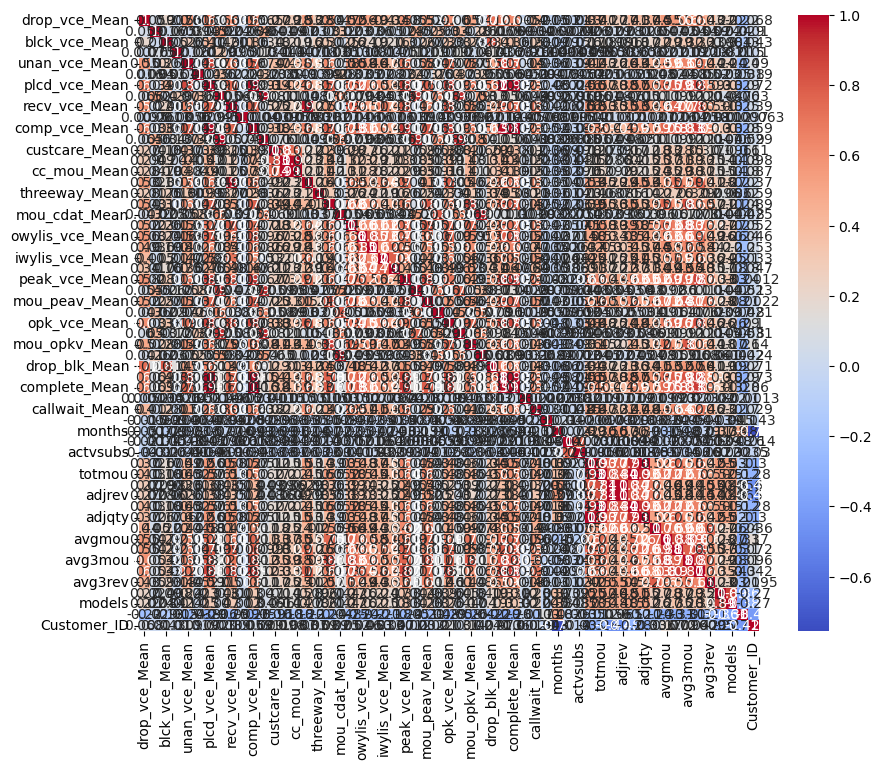

In [50]:
correlacoes = df_P.corr()
plt.figure(figsize=(10, 8))  # Tamanho da figura
sns.heatmap(correlacoes, annot=True, cmap='coolwarm')
plt.show()

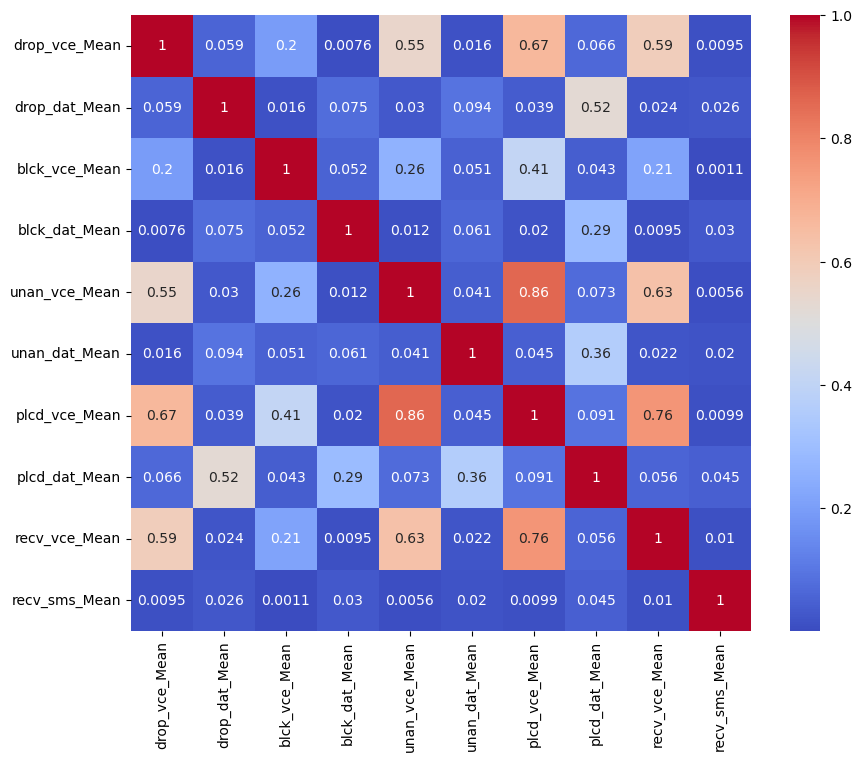

In [51]:
colunas = ['drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean','unan_vce_Mean','unan_dat_Mean','plcd_vce_Mean','plcd_dat_Mean','recv_vce_Mean','recv_sms_Mean' ]
df_subconjunto = df_P[colunas]
correlacoes = df_subconjunto.corr()
plt.figure(figsize=(10, 8))  # Tamanho da figura   #(ANÁLISE DESCRITIVA)
sns.heatmap(correlacoes, annot=True, cmap='coolwarm')
plt.show()

In [52]:
df_P.drop(columns=['plcd_vce_Mean'], inplace=True)
df_P.drop(columns=['unan_vce_Mean'], inplace=True)
df_P.drop(columns=['recv_vce_Mean'], inplace=True)
df_P.drop(columns=['drop_vce_Mean'], inplace=True)



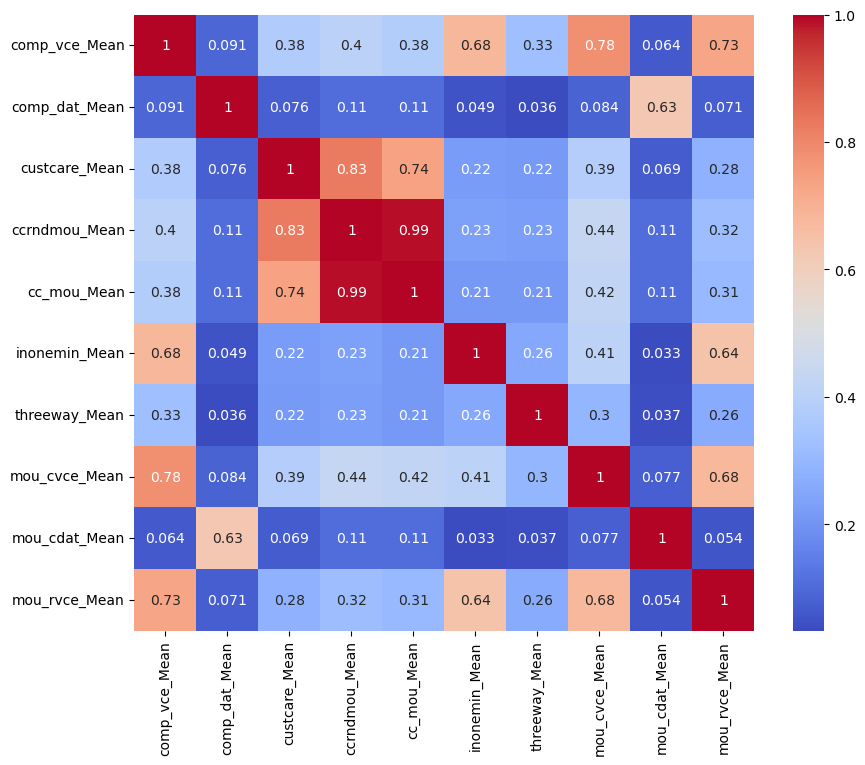

In [53]:
colunas = ['comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean','cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean' ,'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean' ]
df_subconjunto = df_P[colunas]
correlacoes = df_subconjunto.corr()
plt.figure(figsize=(10, 8))  # Tamanho da figura   #(ANÁLISE DESCRITIVA)
sns.heatmap(correlacoes, annot=True, cmap='coolwarm')
plt.show()

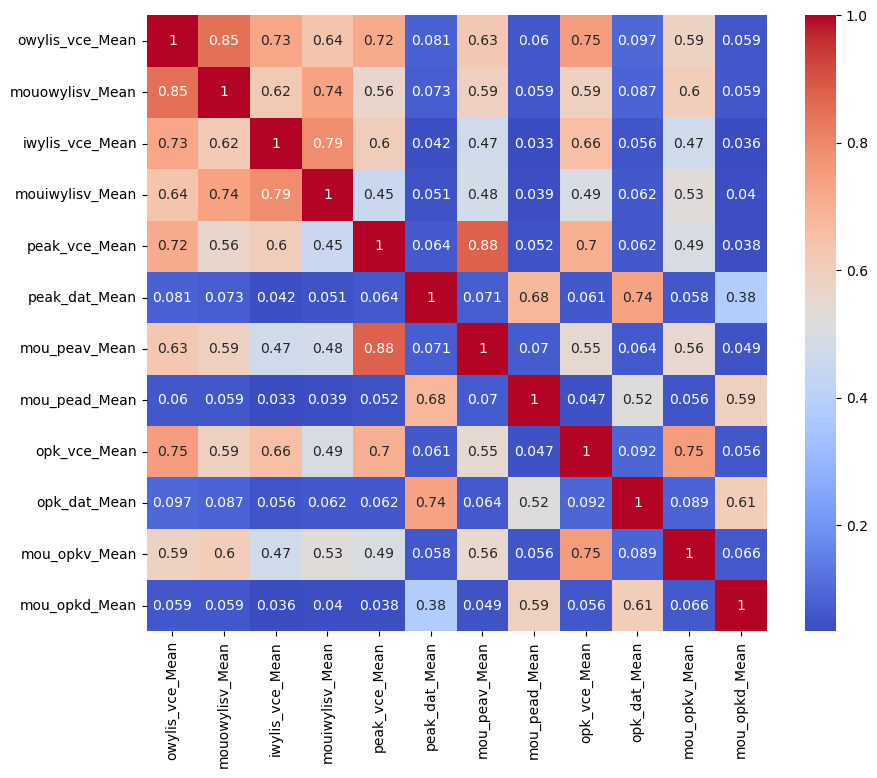

In [54]:
colunas =  ['owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean' ,'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean' ]
df_subconjunto = df_P[colunas]
correlacoes = df_subconjunto.corr()
plt.figure(figsize=(10, 8))  # Tamanho da figura   #(ANÁLISE DESCRITIVA)
sns.heatmap(correlacoes, annot=True, cmap='coolwarm')
plt.show() 


In [55]:
df_P.drop(columns=['comp_vce_Mean', 'comp_dat_Mean','custcare_Mean','ccrndmou_Mean','cc_mou_Mean','mou_cvce_Mean','mou_cdat_Mean','mou_rvce_Mean'], inplace=True)

In [56]:
df_P.drop(columns=['owylis_vce_Mean','mouowylisv_Mean','iwylis_vce_Mean','mouiwylisv_Mean','peak_vce_Mean','peak_dat_Mean','mou_peav_Mean','opk_vce_Mean','opk_dat_Mean','mou_opkv_Mean'], inplace=True)

In [57]:
df_P.head(100)

,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_dat_Mean,plcd_dat_Mean,recv_sms_Mean,inonemin_Mean,threeway_Mean,mou_pead_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,dualband,refurb_new,phones,models,eqpdays,Customer_ID
0,0.0,0.666667,0.0,0.000000,0.000000,0.0,18.000000,0.000000,0.0,0.0,1.333333,52.333333,45.000000,0.000000,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,Y,N,2.0,2.0,361.0,1000001
1,0.0,1.000000,0.0,0.000000,0.000000,0.0,53.000000,0.333333,0.0,0.0,9.333333,263.333333,193.333333,0.000000,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,N,N,7.0,6.0,240.0,1000002
2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.333333,0.000000,0.0,0.0,0.333333,9.000000,6.000000,0.000000,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,N,N,2.0,1.0,1504.0,1000003
3,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.333333,0.000000,0.0,0.0,0.000000,3.666667,3.666667,0.000000,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,N,N,1.0,1.0,1812.0,1000004
4,0.0,0.666667,0.0,0.000000,0.000000,0.0,66.000000,0.000000,0.0,0.0,10.333333,222.333333,137.000000,0.000000,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,Y,N,6.0,4.0,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.333333,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.333333,23.000000,22.000000,0.000000,0.000000,0,52,1,1,Y,A,N,554,787.00000,990.88,973.88,784.00,551,19.10,15.37,10.80,27,21,22,N,N,1.0,1.0,1583.0,1000096
96,0.0,1.333333,0.0,0.000000,0.000000,0.0,7.000000,1.000000,0.0,0.0,7.333333,83.000000,65.000000,0.000000,0.000000,0,54,1,1,Y,C,N,2144,4951.00000,1536.65,1508.79,4946.00,2139,28.47,93.32,40.36,142,77,30,Y,N,4.0,4.0,527.0,1000097
97,0.0,13.666667,0.0,0.000000,0.000000,0.0,34.666667,0.000000,0.0,0.0,24.000000,525.333333,415.000000,0.333333,5.333333,1,52,2,1,N,A,N,26723,58683.05000,4316.34,4220.44,58619.05,26685,82.75,1149.39,523.24,1298,595,88,Y,N,5.0,2.0,807.0,1000098
98,0.0,7.333333,0.0,0.666667,0.666667,0.0,28.333333,0.000000,0.0,0.0,13.000000,338.666667,274.000000,0.000000,2.333333,0,56,2,1,N,A,N,13174,39348.00000,4984.62,4870.35,38608.00,12942,90.19,714.96,239.67,1258,333,86,Y,N,2.0,2.0,652.0,1000099


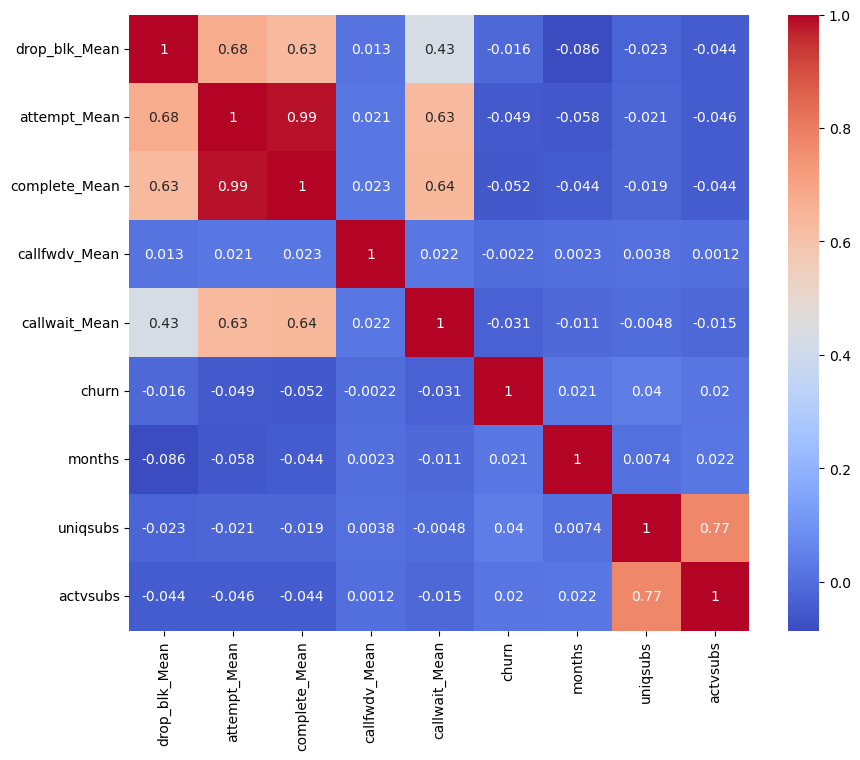

In [58]:
colunas =  ['drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months', 'uniqsubs', 'actvsubs', 'new_cell', 'crclscod' ]
df_subconjunto = df_P[colunas]
correlacoes = df_subconjunto.corr()
plt.figure(figsize=(10, 8))  # Tamanho da figura   #(ANÁLISE DESCRITIVA)
sns.heatmap(correlacoes, annot=True, cmap='coolwarm')
plt.show() 


In [59]:
df_P.drop(columns=['uniqsubs','actvsubs', 'attempt_Mean', 'complete_Mean'], inplace=True)


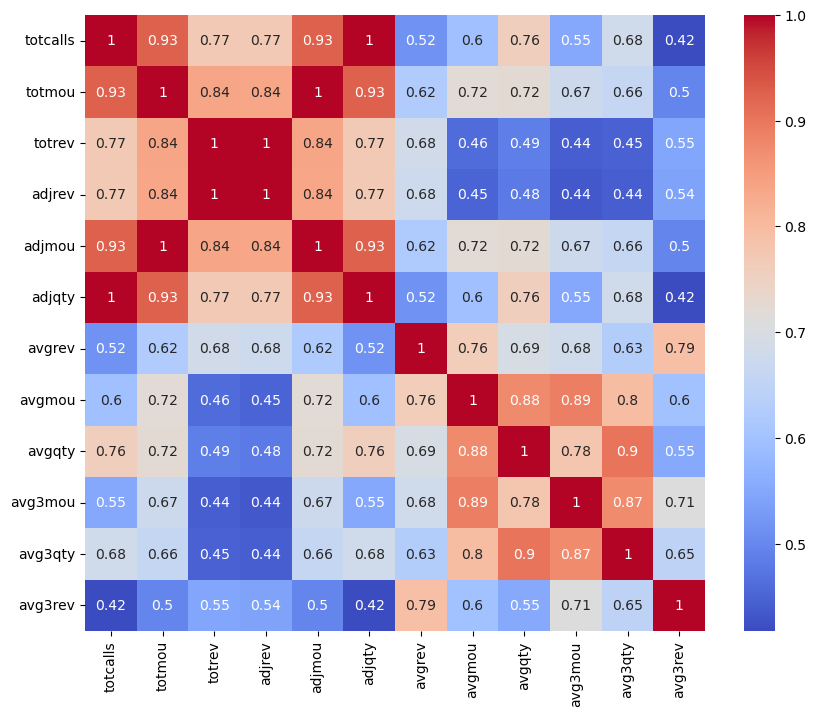

In [60]:
colunas =  ['asl_flag', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev' ]
df_subconjunto = df_P[colunas]
correlacoes = df_subconjunto.corr()
plt.figure(figsize=(10, 8))  # Tamanho da figura   #(ANÁLISE DESCRITIVA)
sns.heatmap(correlacoes, annot=True, cmap='coolwarm')
plt.show() 


In [61]:
df_P.drop(columns=['avg3rev','avg3qty','avg3mou', 'avgqty','avgmou','avgrev','adjqty','adjmou','adjrev','totrev','totmou','totcalls'], inplace=True)

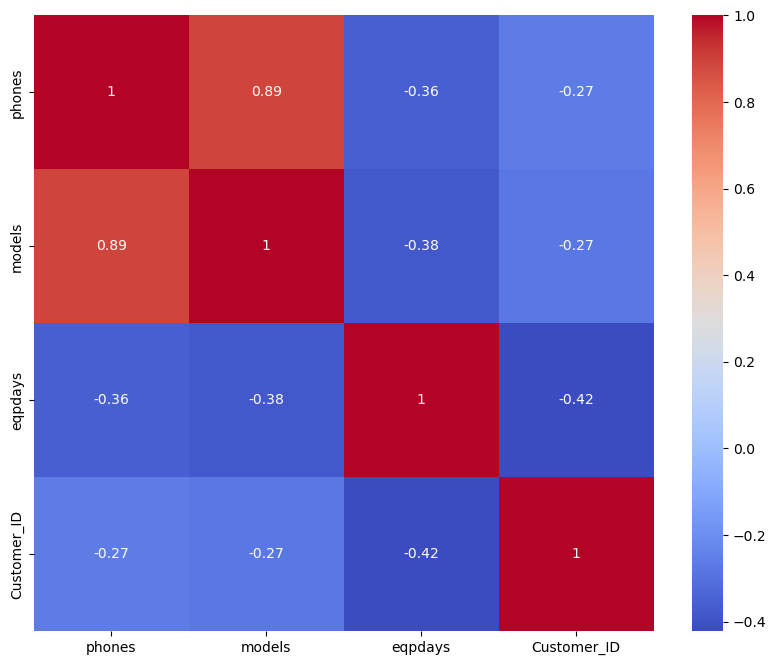

In [62]:
colunas =  ['dualband','refurb_new','phones','models','eqpdays','Customer_ID']
df_subconjunto = df_P[colunas]
correlacoes = df_subconjunto.corr()
plt.figure(figsize=(10, 8))  # Tamanho da figura   #(ANÁLISE DESCRITIVA)
sns.heatmap(correlacoes, annot=True, cmap='coolwarm')
plt.show() 

In [63]:
df_P.drop(columns=['models','phones'], inplace=True)

In [64]:
df_P.head(100)

,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_dat_Mean,plcd_dat_Mean,recv_sms_Mean,inonemin_Mean,threeway_Mean,mou_pead_Mean,mou_opkd_Mean,drop_blk_Mean,callfwdv_Mean,callwait_Mean,churn,months,new_cell,crclscod,asl_flag,dualband,refurb_new,eqpdays,Customer_ID
0,0.0,0.666667,0.0,0.000000,0.000000,0.0,18.000000,0.000000,0.0,0.0,1.333333,0.000000,0.333333,1,61,U,A,N,Y,N,361.0,1000001
1,0.0,1.000000,0.0,0.000000,0.000000,0.0,53.000000,0.333333,0.0,0.0,9.333333,0.000000,5.666667,0,56,N,EA,N,N,N,240.0,1000002
2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.333333,0.000000,0.0,0.0,0.333333,0.000000,0.000000,1,58,Y,C,N,N,N,1504.0,1000003
3,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.333333,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,60,Y,B,N,N,N,1812.0,1000004
4,0.0,0.666667,0.0,0.000000,0.000000,0.0,66.000000,0.000000,0.0,0.0,10.333333,0.000000,0.000000,0,57,Y,A,N,Y,N,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.333333,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.333333,0.000000,0.000000,0,52,Y,A,N,N,N,1583.0,1000096
96,0.0,1.333333,0.0,0.000000,0.000000,0.0,7.000000,1.000000,0.0,0.0,7.333333,0.000000,0.000000,0,54,Y,C,N,Y,N,527.0,1000097
97,0.0,13.666667,0.0,0.000000,0.000000,0.0,34.666667,0.000000,0.0,0.0,24.000000,0.333333,5.333333,1,52,N,A,N,Y,N,807.0,1000098
98,0.0,7.333333,0.0,0.666667,0.666667,0.0,28.333333,0.000000,0.0,0.0,13.000000,0.000000,2.333333,0,56,N,A,N,Y,N,652.0,1000099


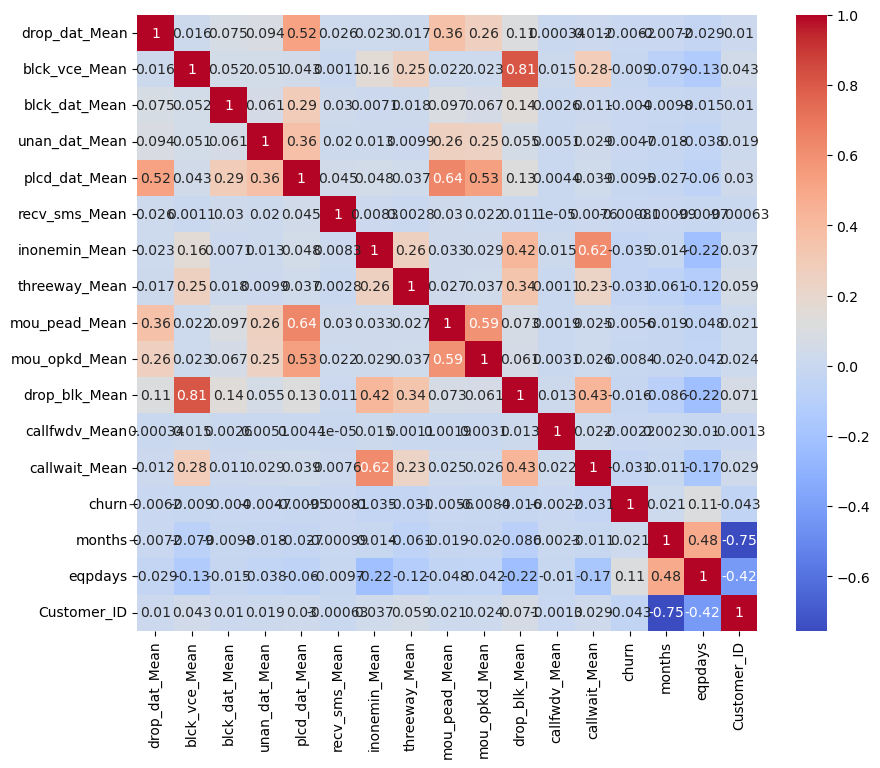

In [65]:
correlacoes = df_P.corr()
plt.figure(figsize=(10, 8))  # Tamanho da figura
sns.heatmap(correlacoes, annot=True, cmap='coolwarm')
plt.show()

In [66]:
cat_cols = df_P.select_dtypes(include=['object']).columns

In [67]:
for col in cat_cols:
    print(f"Valores únicos da coluna {col}:")
    print(df_P[col].unique())

Valores únicos da coluna new_cell:
['U' 'N' 'Y']
Valores únicos da coluna crclscod:
['A' 'EA' 'C' 'B' 'BA' 'D' 'G' 'CA' 'I' 'AA' 'J' 'U' 'Z' 'K' 'E' 'E4' 'W'
 'DA' 'Y' 'CC' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'B2' 'IF' 'Z1' 'O' 'M' 'L'
 'U1' 'Z4' 'A2' 'V' 'TP' 'EM' 'C2' 'C5' 'S' 'EC' 'Z5' 'D2' 'GY' 'ZY' 'E2'
 'A3' 'V1' 'EF' 'Z2' 'CY' 'P1' 'ZF']
Valores únicos da coluna asl_flag:
['N' 'Y']
Valores únicos da coluna dualband:
['Y' 'N' 'T' 'U']
Valores únicos da coluna refurb_new:
['N' 'R']


In [68]:
df_P.drop(columns=['crclscod'], inplace=True)

In [69]:
df_encoded = pd.get_dummies(df_P, columns=['new_cell', 'asl_flag', 'dualband','refurb_new'])#Uncoding

print(df_encoded)

       drop_dat_Mean  blck_vce_Mean  blck_dat_Mean  unan_dat_Mean  \
0                0.0       0.666667            0.0            0.0   
1                0.0       1.000000            0.0            0.0   
2                0.0       0.000000            0.0            0.0   
3                0.0       0.000000            0.0            0.0   
4                0.0       0.666667            0.0            0.0   
...              ...            ...            ...            ...   
99995            0.0       0.000000            0.0            0.0   
99996            0.0       1.000000            0.0            0.0   
99997            0.0       0.000000            0.0            0.0   
99998            0.0       0.666667            0.0            0.0   
99999            0.0       0.666667            0.0            0.0   

       plcd_dat_Mean  recv_sms_Mean  inonemin_Mean  threeway_Mean  \
0           0.000000            0.0      18.000000       0.000000   
1           0.000000            0

In [70]:
train_df, test_df = train_test_split(df_encoded, test_size=0.2, random_state=42)

In [71]:
df_P.shape

(99999, 21)

In [72]:
train_df.shape

(79999, 28)

In [73]:
scaler = MinMaxScaler()
train_df_scaled = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)#corrigido erro de String  (Padronização de Dados)
test_df_scaled = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)#(dados de teste não coloca fit)


In [74]:
X_train = train_df_scaled.drop('churn', axis=1)
y_train = train_df_scaled['churn']

X_test = test_df_scaled.drop('churn', axis=1)
y_test = test_df_scaled['churn']

In [75]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [76]:
#y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:, 1]
y_pred = (y_scores > 0.6).astype(int)

In [77]:
# Calculando acurácia, precisão e recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print('F1-score:', f1)


# Calculando a estatística KS
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
ks_statistic = np.max(tpr - fpr)

print(f'Estatística KS: {ks_statistic}')

Acurácia: 0.5149
Precisão: 0.6008174386920981
Recall: 0.08821764352870574
F1-score: 0.15384615384615385
Estatística KS: 0.13973542558941698


In [78]:
#aplicar novos modelos de machine learning ( Randon forest, LightGBM, XGBoost) + (Métricas de avaliação de modelos)

In [79]:
#modelo Randon Forest
rfc = RandomForestClassifier(n_estimators=300, random_state=42 , max_depth=20, min_samples_split=10)

In [80]:
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=300,
                       random_state=42)

In [81]:
# Fazendo previsões nos dados de teste
y_pred = rfc.predict(X_test)

In [82]:
# Calculando as métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimindo as métricas de desempenho
print('Acurácia:', accuracy)    
print('Precisão:', precision)
print('Recall:', recall)
print('F1-score:', f1)   #acima de 0.5% ja é bom

Acurácia: 0.5996
Precisão: 0.5872194950911641
Recall: 0.6700340068013603
F1-score: 0.6258992805755396


In [83]:
# Definir os hiperparâmetros para otimização
param_grid = {
    'n_estimators': [100, 300 ],
    'max_depth': [  20, 40 ],
    'min_samples_split': [2, 5, 10]
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# Ajustar o modelo e encontrar os melhores hiperparâmetros
grid_search.fit(X_train, y_train)

# Imprimir os melhores hiperparâmetros encontrados
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

Melhores hiperparâmetros: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 300}


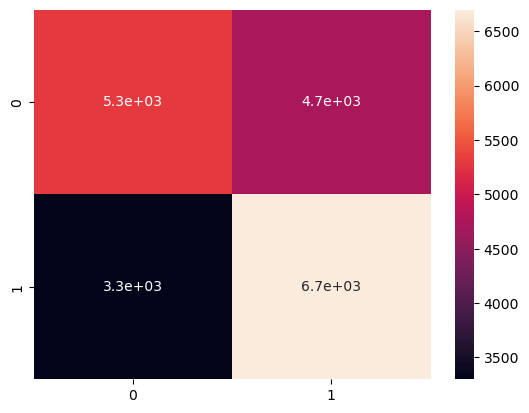

In [84]:
# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
sns.heatmap(cm, annot=True)
plt.show()

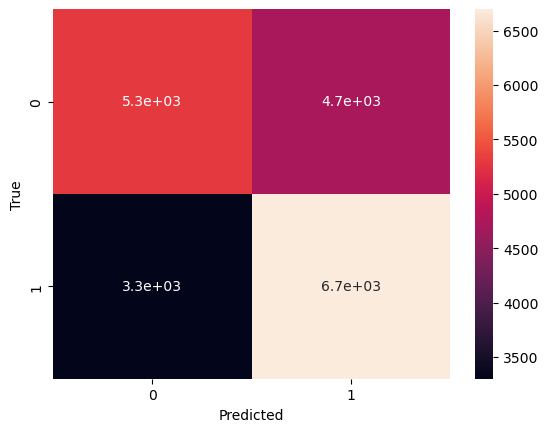

In [85]:

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
#Aplicação do modelo  taxa de erros e acertos + modelo de negócio.(próxima aula.)  Precision x Recall métricas.